# **<center><span style= "color:#368BC1;">Decision Trees</span></center>**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [8]:
# Load the data of titanic
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [10]:
# Drop the columns that are not useful
df.drop('deck', axis=1, inplace=True)

# impute missing values of age, fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked using most frequent 
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

# check the missing values
df.isnull().sum().sort_values(ascending=False)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
# encode the categorical and object variables using for loop label encoder
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = label.fit_transform(df[col].astype(str))

# check the data types
df.dtypes

df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True
5,0,3,1,28.0,0,0,8.4583,1,2,1,True,1,0,True
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,2,0,True
7,0,3,1,2.0,3,1,21.0750,2,2,0,False,2,0,False
8,1,3,0,27.0,0,2,11.1333,2,2,2,False,2,1,False
9,1,2,0,14.0,1,0,30.0708,0,1,0,False,0,1,False


In [19]:
# Split the data into features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [20]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create the model
model = DecisionTreeClassifier()

In [22]:
# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# Predict the model
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



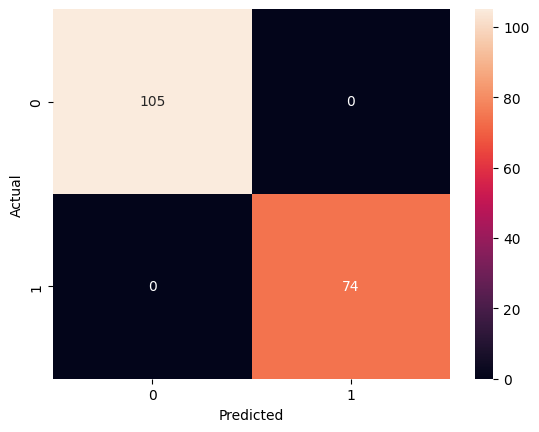

In [26]:
# Plot the confusion matrix using heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
